CQ(컨택 퀄리티)
타자의 능력을 좀 더 다양하게 확인하고 싶다면, 인플레이 타구의 타율(BABIP), 타석당 볼넷비율(BB%), 또는 타석당 삼진비율(K%)을 확인하는 것이 좋다.

BABIP은 타자가 인플레이 타구를 만들었을 때 그것이 어느정도 비율로 안타가 되는지 확인할 수 있는 기록이고, BB%은 타자가 볼넷을 얼마나 잘 얻어내는지, K%는 타자가 삼진아웃을 얼마나 잘 당하는지 쉽게 알 수 있는 지표다.

그러나 BABIP(인플레이 타구의 타율) 만으로 타자가 실제 컨택한 타구에 대한 가치를 평가하기엔 무리가 있다. BABIP은 모든 안타를 동등한 가치로 간주할 뿐 아니라, 무엇보다 홈런을 제외하기 때문이다.

타자들의 인플레이 타구에 대한 퀄리티를 확인할 수 있는 간단한 지표가 있다면 타자가 일단 공을 쳤을 때 그 가치를 평가하기 매우 유용할 것이다.

인플레이 타구 이벤트에 대해 적절히 가중치를 부여하고, BABIP 계산시 제외된 홈런까지 포함시킨 스탯이 있다.  야구기록 사이트인 [팬그래프]에 소개된 컨택 퀄리티(Contact Quality, CQ)가 그것이다.

GPA
OPS의 단점을 보완하기 위해 고안된 지표로 2003년 발표된 GPA(Gross Production Average)가 있다. 
'GPA'는 출루율에 가중치를 부여했고, 타율과 유사한 범위를 갖게 함으로써 값의 수준을 쉽게 이해할 수 있다. 
OPS 만큼은 아니지만  계산식 역시 다음과 같이 매우 간단한 편이다.

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import pymysql
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
from math import pi

mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['font.size'] = 14

In [33]:
conn = pymysql.connect(host='49.247.132.235', user='kbo_db', password='1234',
                       db='kbo_data_db', charset='utf8')

In [34]:
curs = conn.cursor(pymysql.cursors.DictCursor)

In [46]:
sql = '''
select 
cast(player_AVG as decimal(8,3)) as 타율
,cast(player_OBP as decimal(8,3)) as 출루율
,cast(player_SLG as decimal(8,3)) as 장타율
,round(((0.5*cast(player_H as decimal(8,3))) +(0.3*cast(player_TB as decimal(8,3)))) / (cast(player_AB as decimal(8,3)) - cast(player_SO as decimal(8,3))),3)  as CQ
,round((cast(player_OBP as decimal(8,3))*1.8+cast(player_SLG as decimal(8,3)))/4,3) as GBA
from kbo_hitter_total_status
where player_year = '{}'
and player_id = {}
'''.format('2019',76232)

In [47]:
curs.execute(sql)

1

In [48]:
rows = curs.fetchall()

In [80]:
rows

[{'타율': Decimal('0.354'),
  '출루율': Decimal('0.438'),
  '장타율': Decimal('0.574'),
  'CQ': Decimal('0.393'),
  'GBA': Decimal('0.341')}]

In [49]:
for k,v in rows[0].items():
    print(k)

타율
출루율
장타율
CQ
GBA


In [83]:
df_team = pd.DataFrame.from_dict(rows)

In [84]:
df_team = df_team.astype(float)

In [85]:
var1 =  df_team.iloc[0,:].to_list()
var1 += var1[:1]
var1

[0.354, 0.438, 0.574, 0.393, 0.341, 0.354]

In [86]:
df_team

,타율,출루율,장타율,CQ,GBA
0,0.354,0.438,0.574,0.393,0.341


In [87]:
var = ['타율','출루율','장타율','CQ','GBA']
num_var = len(var)
deg = [n/float(num_var) * 2 * pi for n in range(num_var)]
deg += deg[:1]
print(deg)

[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]


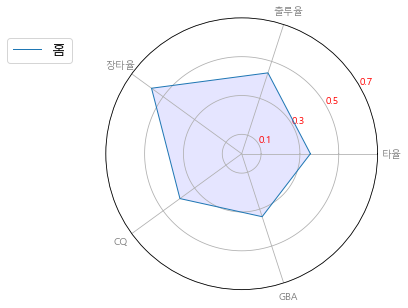

In [114]:
ax = plt.subplot(111,polar=True)
plt.xticks(deg[:-1],var,color='grey',size=10)

ax.set_rlabel_position(30)
plt.yticks([0.1,0.3,0.5,0.7],['0.1','0.3','0.5','0.7'],color='red',size=10)
plt.ylim(0,0.7)

ax.plot(deg,var1,linewidth=1,linestyle='solid',label='홈')
ax.fill(deg,var1,'blue',alpha=0.1)

# ax.plot(deg,var102,linewidth=1,linestyle='solid',label='어웨이팀')
# ax.fill(deg,var102,'blue',alpha=0.1)

plt.legend(loc='best',bbox_to_anchor=(-0.1,0.95))